# Introduction to Jupyter Notebooks
## I'm learning Python

Important parts of this notebook:
1. Import some libraries and define some variables
2. Use `pandas` to load in some weather station data
3. Use `matplotlib` to plot some data
4. Other **stuff**


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

snotel_fname = '637_STAND_WATERYEAR=2008.csv'

In [111]:
snotel_df = pd.read_csv(snotel_fname, skiprows=6, skipfooter=5, engine='python', na_values='-99.9')
snotel_df

,Site Id,Date,Time,WTEQ.I-1 (in),PREC.I-1 (in),TOBS.I-1 (degC),SNWD.I-1 (in),Unnamed: 7
0,637,2007-10-01,00:00,0.0,0.0,8.1,0.0,NaN
1,637,2007-10-01,01:00,0.1,0.0,7.1,0.0,NaN
2,637,2007-10-01,02:00,0.1,0.0,6.4,0.0,NaN
3,637,2007-10-01,03:00,0.1,0.0,5.9,0.0,NaN
4,637,2007-10-01,04:00,0.1,0.0,5.2,0.0,NaN
...,...,...,...,...,...,...,...,...
8779,637,2008-09-30,19:00,0.2,48.6,12.4,0.0,NaN
8780,637,2008-09-30,20:00,0.2,48.6,12.3,0.0,NaN
8781,637,2008-09-30,21:00,0.2,48.6,14.6,0.0,NaN
8782,637,2008-09-30,22:00,0.2,48.5,12.1,0.0,NaN


<Axes: xlabel='Date'>

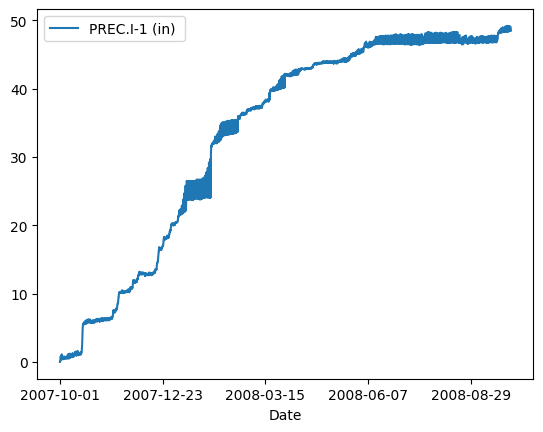

In [112]:
snotel_df.plot(x='Date', y='PREC.I-1 (in) ')

Next steps:
1. How do I combine `Date` and `Time` in the dataframe above to create a singly `datetime64()` object 
2. How do I then take that new `datetime64` object and make it the index? 
3. How do I then `.groupby` the day and then average the precipitation ('PREC.I-1 (in) ') on a daily basis
4. How do I plot those results and do they look better than the above? 


Combines Date and Time in the Dataframe to create a new Datetime64 object and sets it to the index of the Dataframe.

In [113]:
#combines Date and Time columns into new DataFrame
datetime_concat = snotel_df["Date"] + " " + snotel_df["Time"]

#creates new DataFrame from datetime_concat, setting type to Timestamp
datetime64= pd.to_datetime(datetime_concat, yearfirst=True) 

<Axes: xlabel='DateTime'>

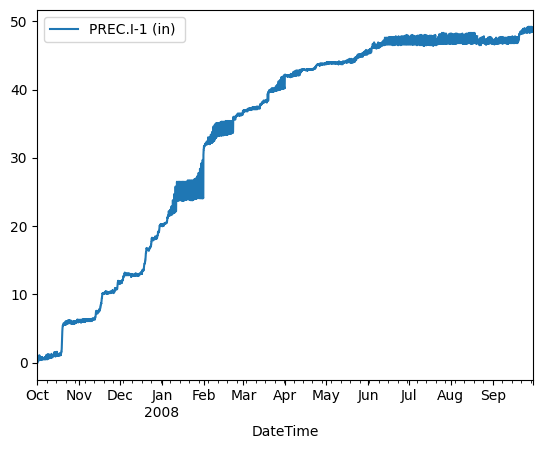

In [114]:
#creates new column in snotel_df using values from datetime64
snotel_df["DateTime"] = datetime64

#sets "DateTime" column as index
snotel_df = snotel_df.set_index("DateTime")\

snotel_df.plot(y="PREC.I-1 (in) ") #x is automatically set to index

The plot looks the same, because nothing has changed except the type of the x axis. Now we can groupby the day and plot daily averages.

<Axes: xlabel='DateTime'>

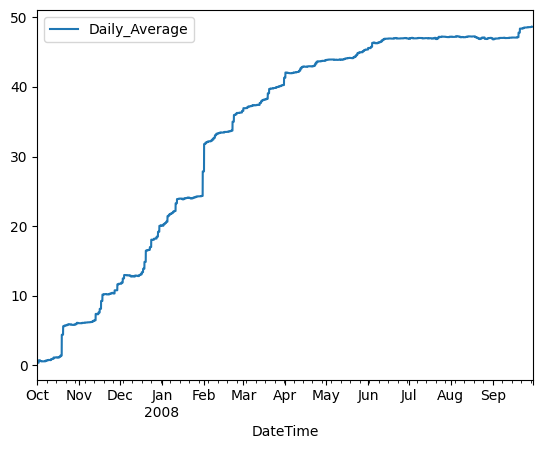

In [144]:
#creates a new DataFrame called snotel_freq with assigned hourly frequency,
#because snotel_df has no specified frequency
snotel_freq = snotel_df.asfreq('h')

#resamples snotel_freq to create new DataFrame with average daily frequency
snotel_daily = snotel_freq["PREC.I-1 (in) "].resample('D').mean()

#creates a new column in snotel_daily called "ForwardFill" that fills NaN values
#with the most recent measurement. Assigns frequency to hourly so there are no
#NaN values when putting back into the original snotel_df DataFrame
snotel_daily["ForwardFill"] = snotel_daily.asfreq('h', method='ffill')

#adds a new column to original DataFrame using snotel_daily["ForwardFill"]
snotel_df["Daily_Average"] = snotel_daily["ForwardFill"]

snotel_df.plot(y="Daily_Average")

The new graph shows average daily precipitation over the course of the 2008 water year. The overall shape of the graph is the same as the original, but the line is a lot neater now that the sensor noise has been dealt with.